In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_por = pd.read_csv('student-por.csv', sep=';')
df_mat = pd.read_csv('student-mat.csv', sep=';')
df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
file= 'student-por.csv'

df = pd.read_csv(file , delimiter=';')
df_math = pd.read_csv('student-mat.csv', delimiter=';')

df.romantic.replace(('yes', 'no'), (1, 0), inplace=True)#0, 1 is in a relationship/ is not
df.internet.replace(('yes', 'no'), (1, 0), inplace=True)#0, 1 no acess at home/ access at home
df.higher.replace(('yes', 'no'), (1, 0), inplace=True)#1, 0 wants to take higher education
df.nursery.replace(('yes', 'no'), (1, 0), inplace=True)#1, 0 attended nurcery school
df.activities.replace(('yes', 'no'), (1, 0), inplace=True)#1, 0 has extra curricular activity
df.paid.replace(('yes', 'no'), (1, 0), inplace=True)
df.famsup.replace(('yes', 'no'), (1, 0), inplace=True)
df.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)

df.rename(columns = {'sex': 'isMale', 'address': 'livesInUrban', 'Pstatus': 'HasBothParents'}, inplace = True)
df.isMale.replace(('F', 'M'), (0, 1), inplace = True)
df.livesInUrban.replace(('U', 'R'), (1, 0), inplace = True)
df.school.replace(('GP', 'MS'),(0, 1), inplace = True ) #0: went to GP, 1 : went t MS
df.HasBothParents.replace(('A', 'T'),(0, 1), inplace = True)
df.Mjob.replace(('at_home', 'health', 'other', 'services', 'teacher'), (0, 1, 1, 1, 1), inplace= True)
df.Fjob.replace(('at_home', 'health', 'other', 'services', 'teacher'), (0, 1, 1, 1, 1), inplace= True)
df.famsize.replace(('GT3', 'LE3'),(1, 0), inplace = True)
df.guardian.replace(('mother', 'father', 'other'),(1, 1, 0), inplace = True)

df_por = df

In [4]:
df = df.drop(['reason'], axis=1)
df.guardian.unique()

array([1, 0], dtype=int64)

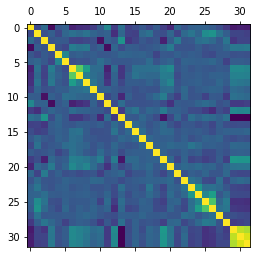

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.matshow(df.corr())
plt.show()

# df_small = df.iloc[:,:6]

correlation_mat = df.corr()



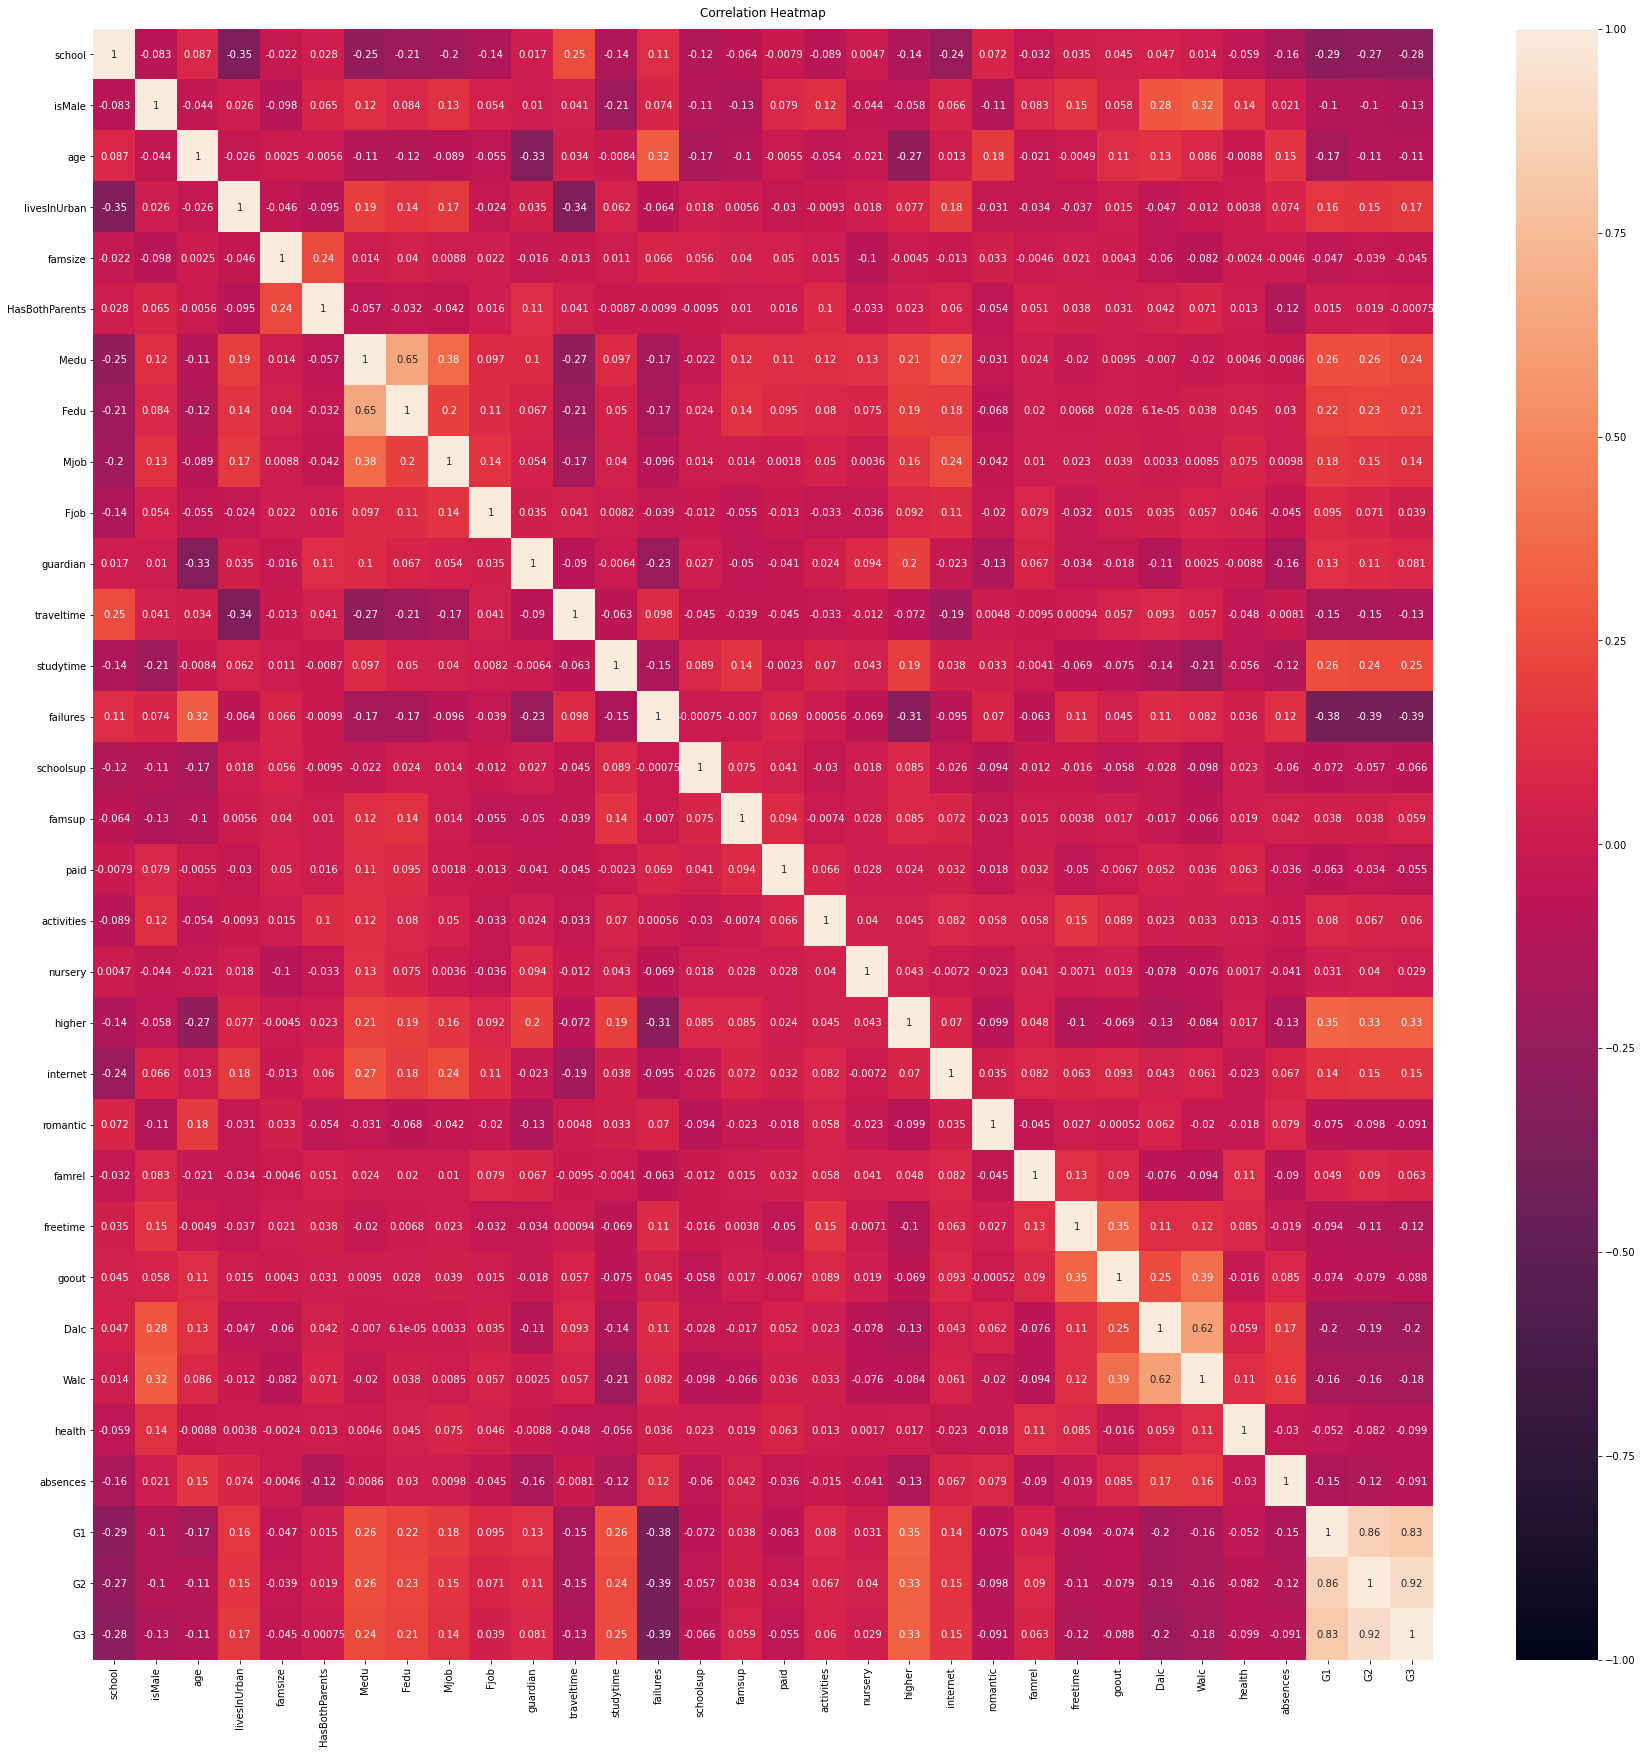

In [6]:
plt.figure(figsize=(30, 30))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [7]:
G1 = df['G1']
G2 = df['G2']
df = df.drop(['G2'], axis=1)
df = df.drop(['G1'], axis=1)
df

,school,isMale,age,livesInUrban,famsize,HasBothParents,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,0,0,18,1,1,0,4,4,0,1,...,0,0,4,3,4,1,1,3,4,11
1,0,0,17,1,1,1,1,1,0,1,...,1,0,5,3,3,1,1,3,2,11
2,0,0,15,1,0,1,1,1,0,1,...,1,0,4,3,2,2,3,3,6,12
3,0,0,15,1,1,1,4,2,1,1,...,1,1,3,2,2,1,1,5,0,14
4,0,0,16,1,1,1,3,3,1,1,...,0,0,4,3,2,1,2,5,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,1,1,2,3,1,1,...,1,0,5,4,2,1,2,5,4,10
645,1,0,18,1,0,1,3,1,1,1,...,1,0,4,3,4,1,1,1,4,16
646,1,0,18,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,5,6,9
647,1,1,17,1,0,1,3,1,1,1,...,1,0,2,4,5,3,4,2,6,10


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:-2], df.iloc[:, -1], test_size=0.15)
y_train

540    11
466    11
332    18
327    18
278    13
       ..
95     13
309    14
259    10
70     11
144    11
Name: G3, Length: 551, dtype: int64

In [9]:
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

y_pred = model.predict(X_test)


coefficient of determination: 0.34506147945910315


In [10]:
mse = np.sqrt(np.square(np.subtract(y_pred, y_test))).mean()
print(mse)
# /2.142758403321539 without normalize

1.7861308575678367


In [11]:
# Math preproccesing

df = df_mat

df.romantic.replace(('yes', 'no'), (1, 0), inplace=True)#0, 1 is in a relationship/ is not
df.internet.replace(('yes', 'no'), (1, 0), inplace=True)#0, 1 no acess at home/ access at home
df.higher.replace(('yes', 'no'), (1, 0), inplace=True)#1, 0 wants to take higher education
df.nursery.replace(('yes', 'no'), (1, 0), inplace=True)#1, 0 attended nurcery school
df.activities.replace(('yes', 'no'), (1, 0), inplace=True)#1, 0 has extra curricular activity
df.paid.replace(('yes', 'no'), (1, 0), inplace=True)
df.famsup.replace(('yes', 'no'), (1, 0), inplace=True)
df.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)

df.rename(columns = {'sex': 'isMale', 'address': 'livesInUrban', 'Pstatus': 'HasBothParents'}, inplace = True)
df.isMale.replace(('F', 'M'), (0, 1), inplace = True)
df.livesInUrban.replace(('U', 'R'), (1, 0), inplace = True)
df.school.replace(('GP', 'MS'),(0, 1), inplace = True ) #0: went to GP, 1 : went t MS
df.HasBothParents.replace(('A', 'T'),(0, 1), inplace = True)
df.Mjob.replace(('at_home', 'health', 'other', 'services', 'teacher'), (0, 1, 1, 1, 1), inplace= True)
df.Fjob.replace(('at_home', 'health', 'other', 'services', 'teacher'), (0, 1, 1, 1, 1), inplace= True)
df.famsize.replace(('GT3', 'LE3'),(1, 0), inplace = True)
df.guardian.replace(('mother', 'father', 'other'),(1, 1, 0), inplace = True)
df = df.drop(['reason'], axis=1)
G1_math = df['G1']
G2_math = df['G2']
df = df.drop(['G2'], axis=1)
df = df.drop(['G1'], axis=1)
df_mat = df

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0:-2], df.iloc[:, -1], test_size=0.15)


model2 = LinearRegression(normalize=True)
model2.fit(X_train, y_train)
r_sq = model2.score(X_train, y_train)
print('coefficient of determination:', r_sq)

y_pred = model2.predict(X_test)

coefficient of determination: 0.21941051886376906


In [13]:
mse = np.sqrt(np.square(np.subtract(y_pred, y_test))).mean()
print(mse)
len(X_test.iloc[0])
# without normalize 3.6058236902471563


2.57059704677829


28

In [14]:
Jannes_X_math = np.array([0, 1, 21, 1, 0, 1, 4, 4, 1, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0, 1, 1, 0, 4, 3, 3, 2, 2, 4])
# umar_X_math = np.array([0, 1, 26, 1, 5, 1,4,4,1,1,0,1,5,3,0,0,0,1,0,1,1,1,5,1,2,1,0,3])
Jannes_X_math = np.array([0, 1, 20, 1, 5, 1, 4, 4, 1, 1, 1, 1,4,3,0,0,0,1,0,1,1,0,4,4,5,5,5,4])

In [15]:
entry = np.array(df.iloc[0])
jannes_pred_math = model2.predict(Jannes_X_math.reshape(1, -1))
print("Jannes' math score:", jannes_pred_math)

Jannes' math score: [3.16813339]


In [16]:
Jannes_X_por = Jannes_X_math
jannes_pred_por = model.predict(Jannes_X_por.reshape(1, -1))
print("Jannes' portuguese score:", jannes_pred_por)

Jannes' portuguese score: [7.37892595]


In [17]:
umar_pred_math = model2.predict(umar_X_math.reshape(1, -1))
print("Umar's math score:", umar_pred_math)

NameError: name 'umar_X_math' is not defined

In [ ]:
umar_X_por = umar_X_math
umar_pred_por = model.predict(umar_X_por.reshape(1, -1))
print("Umar's portuguese score:", umar_pred_por)